잠깐만 복습을 해보면 선형 회귀 모델의 가설식은 $H(x) = Wx + b$이었습니다. 그리고 이 가설식을 구현하기 위해서 파이토치의 nn.Linear()를 사용했습니다. 그리고 로지스틱 회귀의 가설식은 $H(x) = sigmoid(Wx + b)$입니다. 파이토치에서는 nn.Sigmoid()를 통해서 시그모이드 함수를 구현하므로 결과적으로 nn.Linear()의 결과를 nn.Sigmoid()를 거치게하면 로지스틱 회귀의 가설식이 됩니다.

파이토치를 통해 이를 구현해봅시다.

# 1. 파이토치의 nn.Linear와 nn.Sigmoid로 로지스틱 회귀 구현하기

---

우선 구현을 위해 필요한 파이토치의 도구들을 임포트합니다.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

훈련 데이터를 텐서로 선언합니다.

In [3]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

nn.Sequential()은 nn.Module 층을 차례로 쌓을 수 있도록 합니다. 뒤에서 이를 이용해서 인공 신경망을 구현하게 되므로 기억하고 있으면 좋습니다. 조금 쉽게 말해서 nn.Sequential()은 $Wx + b$와 같은 수식과 시그모이드 함수 등과 같은 여러 함수들을 연결해주는 역할을 합니다. 이를 이용해서 로지스틱 회귀를 구현해봅시다.

In [4]:
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

현재 W와 b는 랜덤 초기화가 된 상태입니다. 훈련 데이터를 넣어 예측값을 확인해봅시다.

In [5]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

6 × 1 크기의 예측값 텐서가 출력됩니다. 그러나 현재 W와 b는 임의의 값을 가지므로 현재의 예측은 의미가 없습니다.
이제 경사 하강법을 사용하여 훈련해보겠습니다. 총 100번의 에포크를 수행합니다.

각 에포크마다 정확도를 계산하여 정확도도 출력해보겠습니다.

In [6]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))


Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614852 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

중간부터 정확도는 100%가 나오기 시작합니다. 기존의 훈련 데이터를 입력하여 예측값을 확인해보겠습니다.

In [7]:
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

0.5를 넘으면 True, 그보다 낮으면 False로 간주합니다. 실제값은 [[0], [0], [0], [1], [1], [1]]입니다. 이는 False, False, False, True, True, True에 해당되므로 전부 실제값과 일치하도록 예측한 것을 확인할 수 있습니다.

훈련 후의 W와 b의 값을 출력해보겠습니다.

In [8]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


출력값이 앞 챕터에서 nn.Module을 사용하지 않고 로지스틱 회귀를 구현한 실습에서 얻었던 W와 b와 거의 일치합니다.

# 2. 인공 신경망으로 표현되는 로지스틱 회귀.

---

사실 로지스틱 회귀는 인공 신경망으로 간주할 수 있습니다.

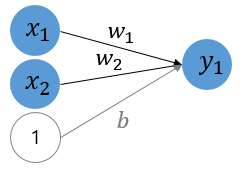

위의 인공 신경망 그림에서 각 화살표는 입력과 곱해지는 가중치 또는 편향입니다. 각 입력에 대해서 검은색 화살표는 가중치, 회색 화살표는 편향이 곱해집니다. 각 입력 $x$
는 각 입력의 가중치 $w$와 곱해지고, 편향 $b$는 상수 1과 곱해지는 것으로 표현되었습니다. 그리고 출력하기 전에 시그모이드 함수를 지나게 됩니다.

결과적으로 위의 인공 신경망은 다음과 같은 다중 로지스틱 회귀를 표현하고 있습니다.

$$
H(x)=sigmoid(x_{1}w_{1} + x_{2}w_{2} + b)
$$

---

+ **뒤에서 인공 신경망을 배우면서 언급하겠지만, 시그모이드 함수는 인공 신경망의 은닉층에서는 거의 사용되지 않습니다.**